## King County House Prices Prediction - Regression Project

This is a classifc regression type of project, to predict the price of the houses based on their characteristics. 

### Author: Henrique Proba

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [6]:
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* id: notation for a house
* dateDate: house was sold
* pricePrice: is prediction target
* bedroomsNumber: Bedrooms/House
* bathroomsNumber: bathrooms/House
* sqft_livingsquare: footage of the home
* sqft_lotsquare: footage of the lot
* floorsTotal: floors (levels) in house
* waterfrontHouse: which has a view to a waterfront
* viewHas: been viewed
* condition: How good the condition is ( Overall )
* gradeoverall: grade given to the housing unit, based on King County grading system
* sqft_abovesquare: footage of house apart from basement
* sqft_basementsquare: footage of the basement
* yr_builtBuilt: Year
* yr_renovatedYear: when house was renovated
* zipcode: zip
* lat: Latitude coordinate
* long: Longitude coordinate
* sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15lot: Size area in 2015(implies-- some renovations)

> - Always when there are a lot columns in the dataset I try to write the description of them in order to have in mind what they are and how can they affect the target variable as well to creat my initial assumptions.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


> - This datasets looks clean: withouth null values (this situation doesn't happen in the real world 90% of the time...lol)

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
# Let's generate a new column called year_sold based on the first 04 characters from df['date'] and drop it afterwards.
df['year_sold'] = df['date'].apply(lambda x: int(x[0:4]))
df.drop('date', axis=1, inplace=True)

In [0]:
# ps: really handy way to store values from a column to a list is to use df['col_name'].tolist()
features = df.iloc[:,2:].columns.tolist()
target = df.iloc[:,1].name

In [11]:
# I found this approach though Kaggle, which returns a DataFrame with the top 10 features that are highly correlated with the target variable.
from scipy.stats import pearsonr
corrs_dict = {}
for f in features:
    data_temp = df[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' X ' + target
    corrs_dict[key] = pearsonr(x1,x2)[0]
    
df_corr = pd.DataFrame(corrs_dict, index=['Value']).T
df_corr.loc[df_corr['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living X price,0.702035
grade X price,0.667434
sqft_above X price,0.605567
sqft_living15 X price,0.585379
bathrooms X price,0.525138
view X price,0.397293
sqft_basement X price,0.323816
bedrooms X price,0.308350
lat X price,0.307003
waterfront X price,0.266369


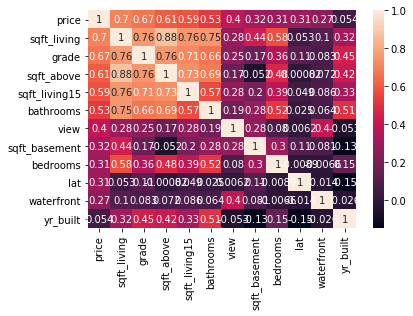

In [12]:
# Let's visualize the same information with a heatmap
feature_col=['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement','bedrooms', 'lat', 'waterfront','yr_built']
df_ml = df[feature_col]
corr = df_ml.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

<Figure size 576x360 with 0 Axes>

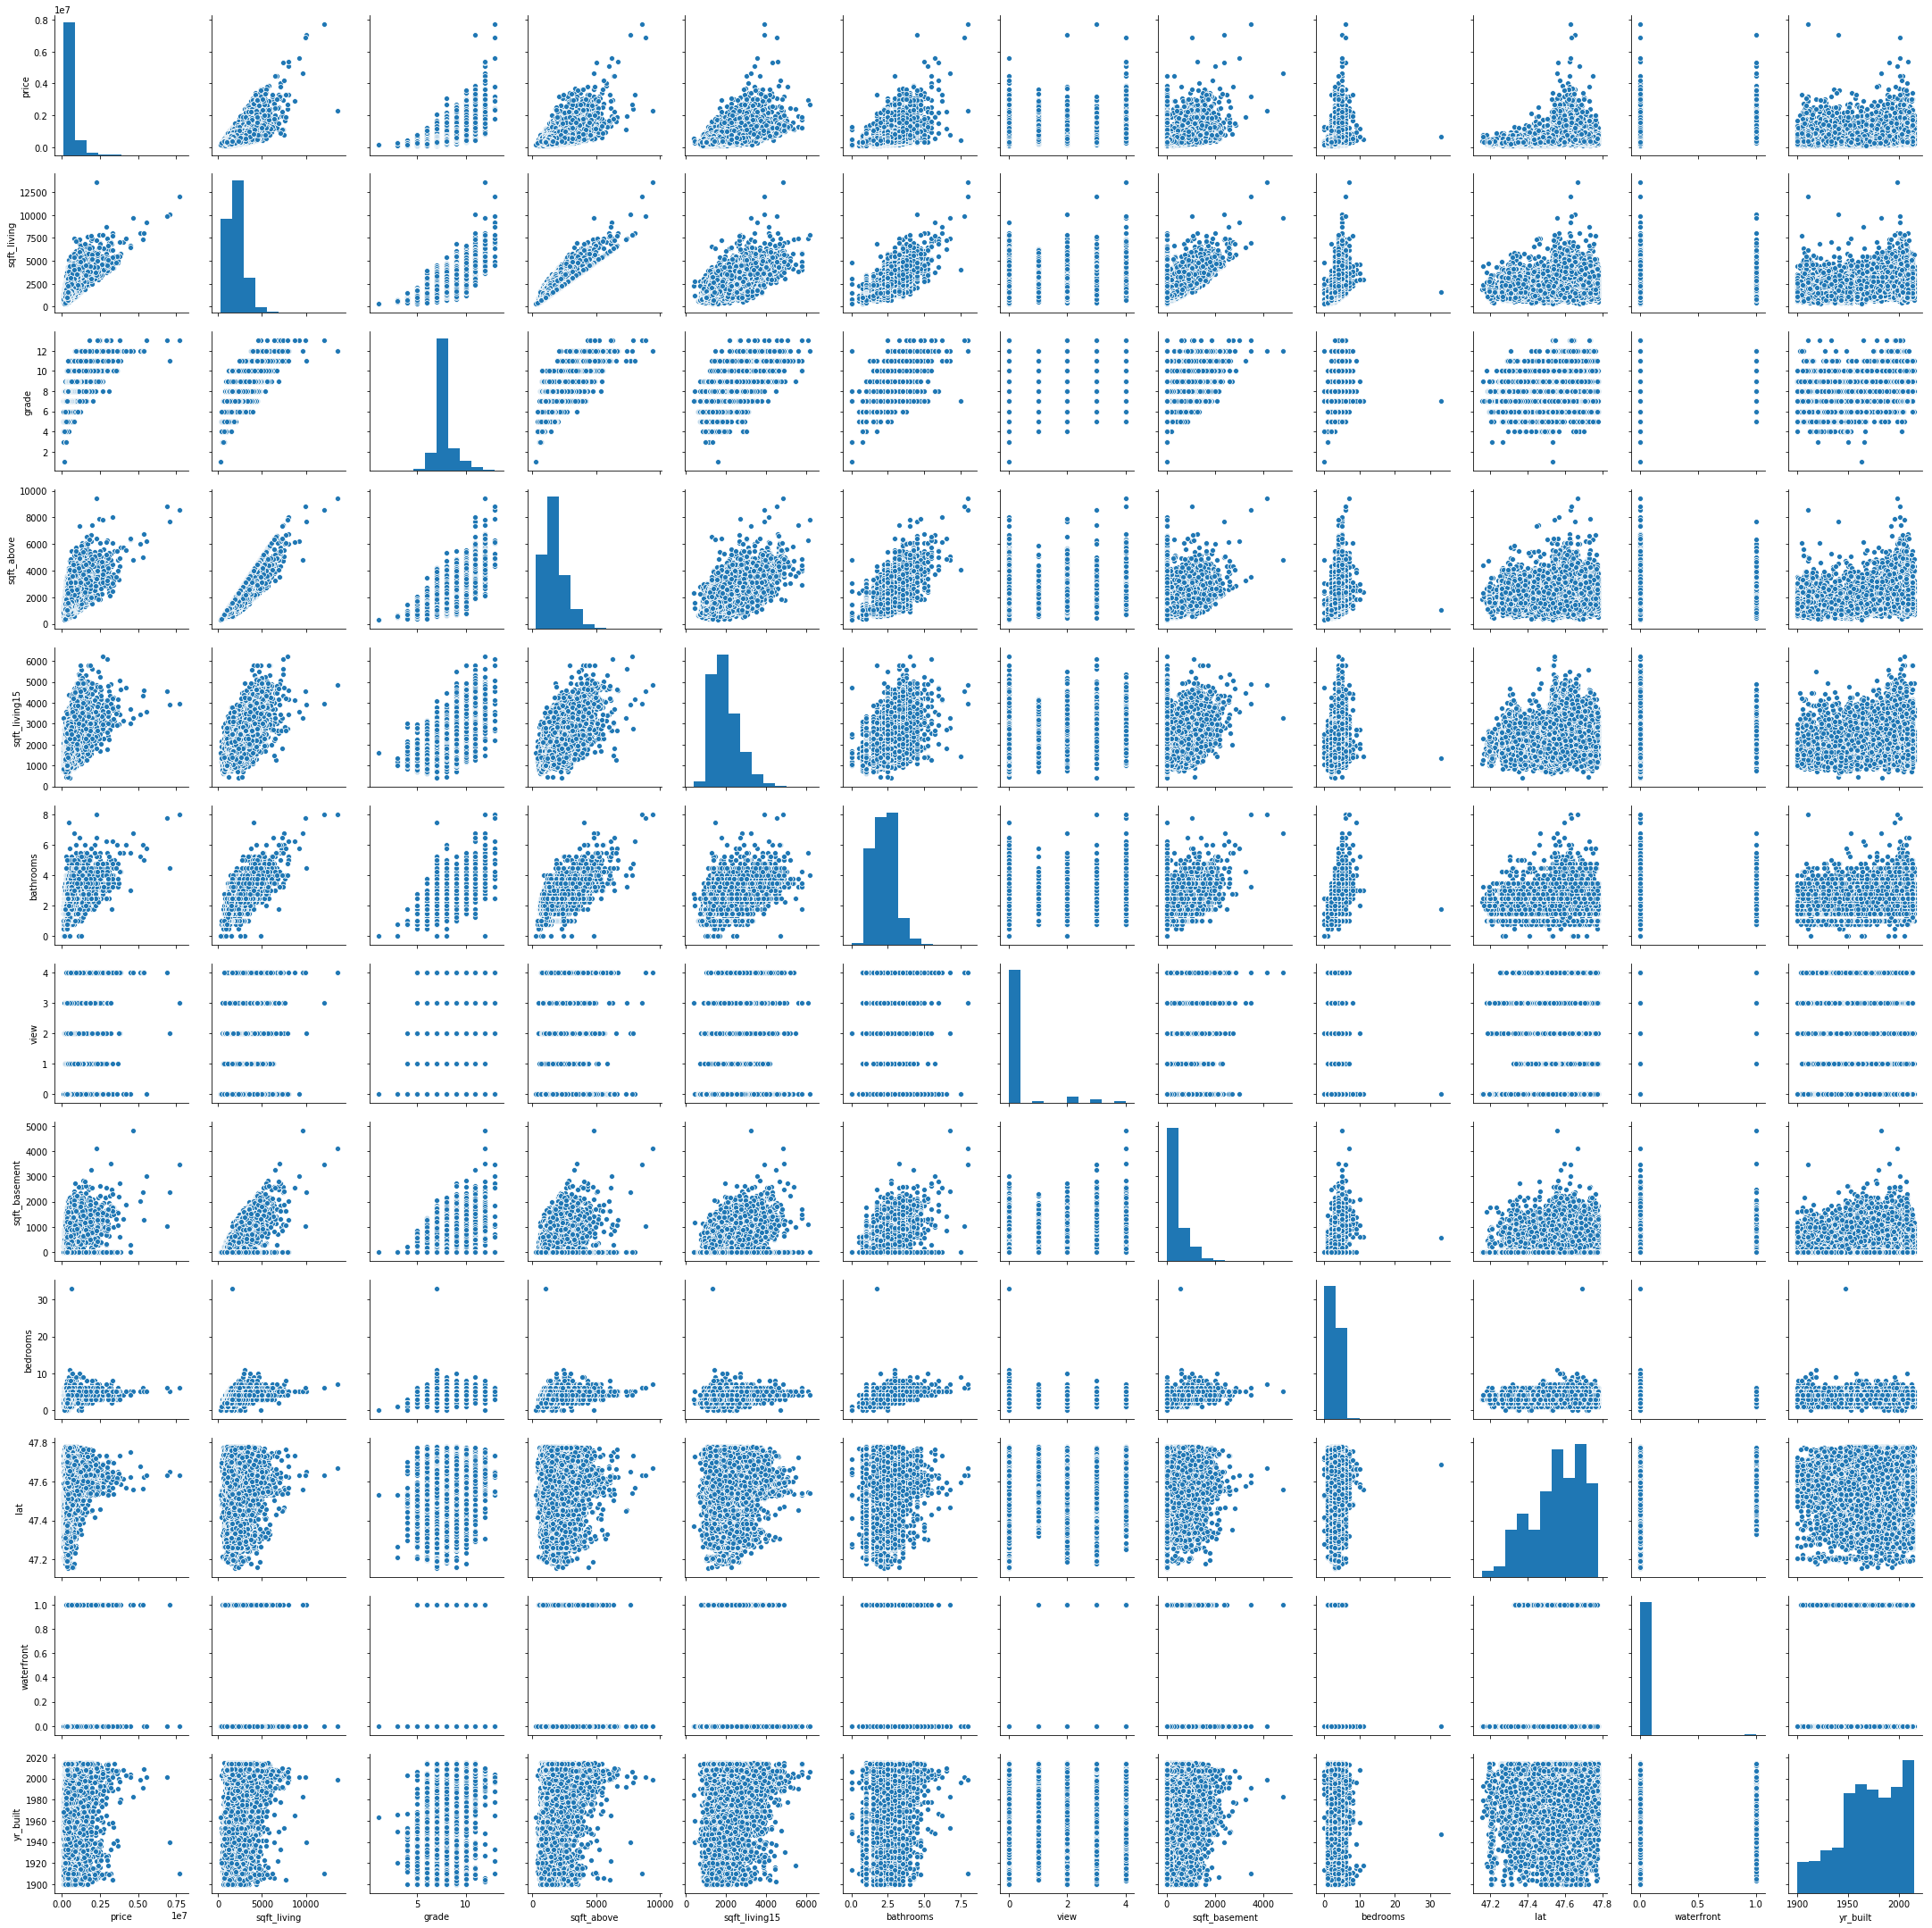

In [14]:
plt.figure(figsize=(8,5))
sns.pairplot(df[feature_col])

Skewness:4.024069144684712


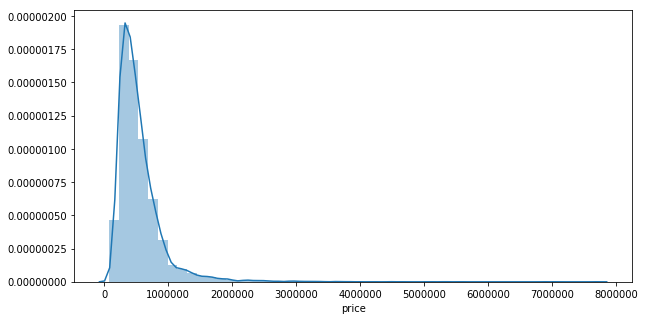

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(df_ml['price'])
price_skew = df_ml['price'].skew(axis = 0, skipna = True) 
print("Skewness:{}".format(price_skew))

> - As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. The Sale Price distribution is highly skewed but I won't use np.log to adjust it because I'm concerned with the business problem being biased by this change.

### Predicting House Prices

#### Linear Regression

In [0]:
y= df_ml['price'].values
X= df_ml.drop('price', axis=1).values

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [0]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

In [19]:
mlr.score(X_test,y_test)

0.6971279079884627

> 69.71%  I think this accuracy can be improved!

#### XGBoost

In [21]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.07, gamma=0, subsample=0.80 ,colsample_bytree=1, max_depth=7)
xgb_train, xgb_test = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

[00:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [22]:
xgb_pred = xgb.predict(X_test)
print(explained_variance_score(xgb_pred,y_test))

0.7901351172480161


> Using XGBoost the model was able to return a 79.01% accuracy! 